# Machine Learning Course - Final Project

## Part 2: Unsupervised Learning - Clustering Text or Images
### Option A: Clustering Movie Scripts into Genres (Text)

### Importing libraries

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
import re
import warnings

In [3]:
warnings.filterwarnings('ignore')

### Including required NLTK data

In [4]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\enginur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\enginur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

### Loading the data

In [6]:
# Load dataset
df = pd.read_csv('./IMDB-Dataset.csv')

Showing a briefing of the dataset

In [7]:
# Show dataset head
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Data preprocessing

Cleaning the text data

In [8]:
# Clean the text data
print("\nCleaning text...")
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Convert to lowercase and remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    return ' '.join(w for w in words if w not in stop_words)

df['clean_review'] = df['review'].apply(clean_text)


Cleaning text...


### Text vectorization using TF-IDF feature

In [9]:
# Convert text to TF-IDF feature
print("\nCreating TF-IDF features...")
vectorizer = TfidfVectorizer(max_features=3000)
features = vectorizer.fit_transform(df['clean_review'])
print(f"Created {features.shape[1]} features")


Creating TF-IDF features...
Created 3000 features


### Preparing and training clustering algorithms

Preparing clustering algorithms

In [10]:
# Set up clustering algorithms
n_clusters = 5  # We'll use 5 clusters for algorithms that need this parameter
algorithms = {
    'K-Means': KMeans(n_clusters=n_clusters, random_state=42),
    'Agglomerative': AgglomerativeClustering(n_clusters=n_clusters),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}

Performing clustering and calculating metrics

In [11]:
# Step 5: Perform clustering and calculate metrics
print("\nPerforming clustering analysis...")
results = {}
for name, algorithm in algorithms.items():
    print(f"\nRunning {name}...")
    
    # Convert sparse matrix to dense for algorithms that need it
    feature_array = features.toarray()
    
    # Perform clustering
    clusters = algorithm.fit_predict(feature_array)
    
    # Calculate performance metrics
    silhouette = silhouette_score(feature_array, clusters)
    calinski = calinski_harabasz_score(feature_array, clusters)
    
    # Store results
    results[name] = {
        'clusters': clusters,
        'silhouette': silhouette,
        'calinski': calinski
    }
    
    print(f"Number of clusters: {len(np.unique(clusters))}")
    print(f"Silhouette Score: {silhouette:.3f}")
    print(f"Calinski-Harabasz Score: {calinski:.3f}")


Performing clustering analysis...

Running K-Means...
Number of clusters: 5
Silhouette Score: 0.002
Calinski-Harabasz Score: 164.860

Running Agglomerative...
Number of clusters: 5
Silhouette Score: -0.003
Calinski-Harabasz Score: 63.598

Running DBSCAN...
Number of clusters: 2
Silhouette Score: -0.002
Calinski-Harabasz Score: 4.962


### Visualizing clustering metrics

Visualization preparation

In [12]:
# Step 6: Visualize clustering metrics
print("\nCreating performance visualizations...")
plt.figure(figsize=(15, 6))


Creating performance visualizations...


<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

Plotting Silhouette scores

Text(0, 0.5, 'Silhouette Score')

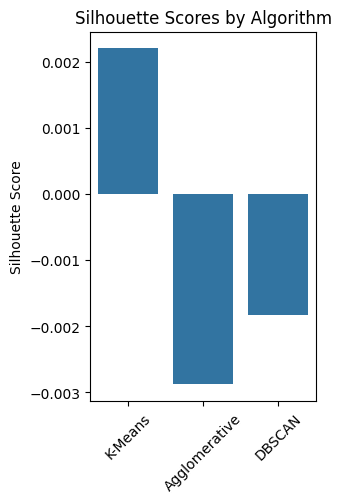

In [13]:
# Plot Silhouette Scores
plt.subplot(1, 2, 1)
algorithms = list(results.keys())
silhouette_scores = [results[alg]['silhouette'] for alg in algorithms]
sns.barplot(x=algorithms, y=silhouette_scores)
plt.title('Silhouette Scores by Algorithm')
plt.xticks(rotation=45)
plt.ylabel('Silhouette Score')

Plotting Calinski-Harabasz Scores

Text(0, 0.5, 'Calinski-Harabasz Score')

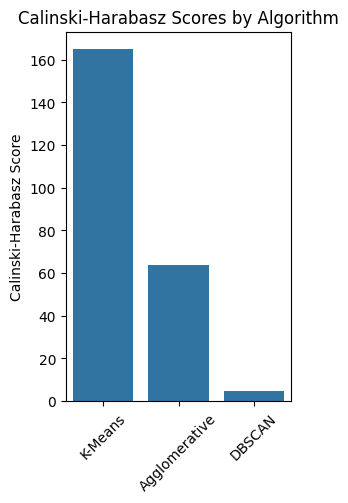

In [14]:
# Plot Calinski-Harabasz Scores
plt.subplot(1, 2, 2)
calinski_scores = [results[alg]['calinski'] for alg in algorithms]
sns.barplot(x=algorithms, y=calinski_scores)
plt.title('Calinski-Harabasz Scores by Algorithm')
plt.xticks(rotation=45)
plt.ylabel('Calinski-Harabasz Score')

In [15]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

### Create clustering visualization for each algorithm

Performing dimentionality reduction and visualization preparations

In [16]:
# Create cluster visualizations for each algorithm
print("\nCreating cluster visualizations...")
# Perform dimensionality reduction once
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features.toarray())

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features.toarray())


Creating cluster visualizations...


Visualizing clusters for each algorithm

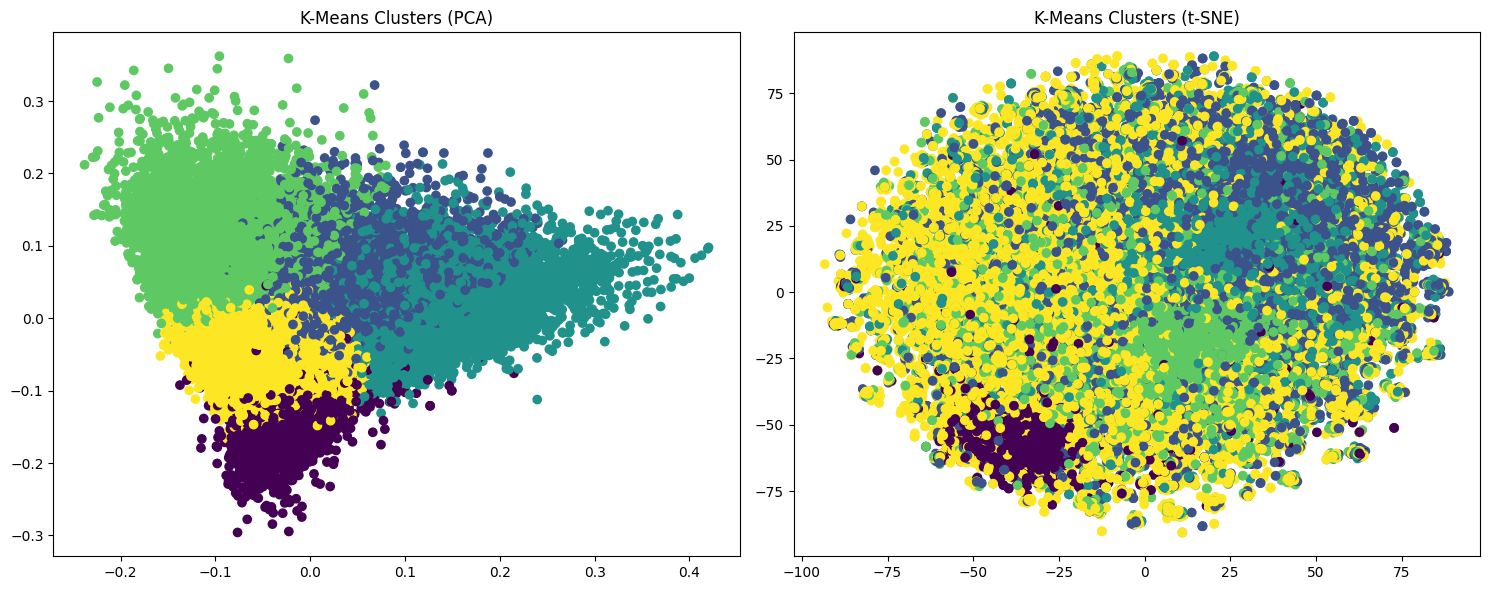

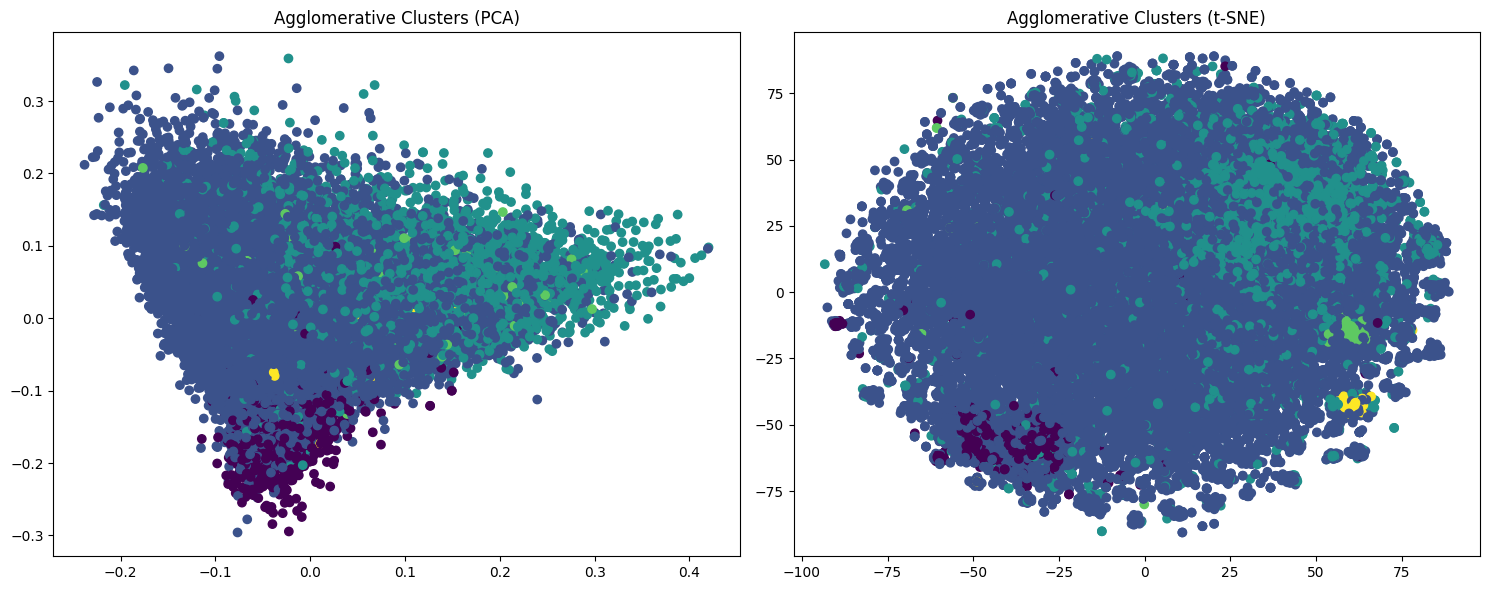

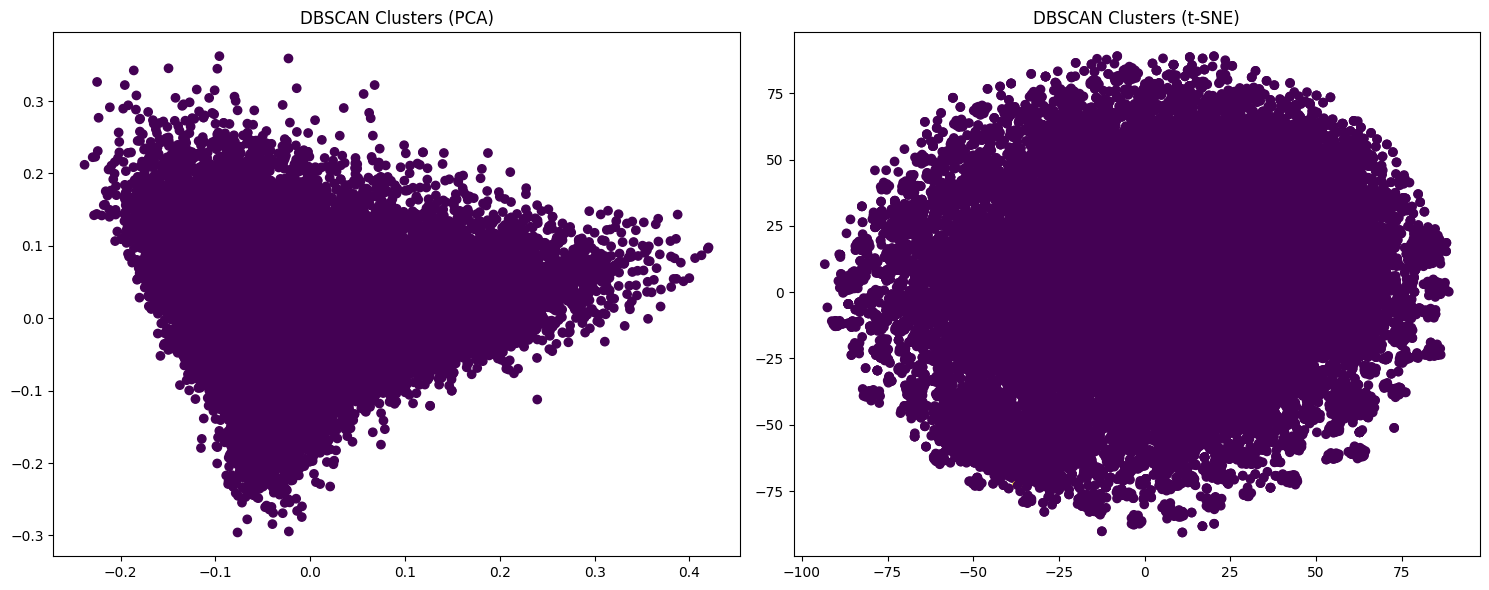

In [17]:
# Visualize clusters for each algorithm
for name, result in results.items():
    plt.figure(figsize=(15, 6))
    
    # Plot PCA
    plt.subplot(1, 2, 1)
    plt.scatter(pca_result[:, 0], pca_result[:, 1], 
                c=result['clusters'], cmap='viridis')
    plt.title(f'{name} Clusters (PCA)')
    
    # Plot t-SNE
    plt.subplot(1, 2, 2)
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], 
                c=result['clusters'], cmap='viridis')
    plt.title(f'{name} Clusters (t-SNE)')
    
    plt.tight_layout()
    plt.show()

### Analyzing cluster contents

In [18]:
# Analyze cluster contents
print("\nAnalyzing cluster contents...")
# Get the most common terms in each K-Means cluster
kmeans_clusters = results['K-Means']['clusters']
vectorizer_features = vectorizer.get_feature_names_out()

for cluster_id in range(n_clusters):
    # Get reviews in this cluster
    cluster_docs = df.loc[kmeans_clusters == cluster_id, 'clean_review']
    
    # Create a new TF-IDF vectorizer for this cluster
    cluster_vectorizer = TfidfVectorizer(max_features=10)
    cluster_tfidf = cluster_vectorizer.fit_transform(cluster_docs)
    
    # Get top terms
    top_terms = cluster_vectorizer.get_feature_names_out()
    print(f"\nCluster {cluster_id} top terms:")
    print(", ".join(top_terms))

print("\nAnalysis complete!")


Analyzing cluster contents...

Cluster 0 top terms:
episode, good, like, one, really, series, show, shows, time, would

Cluster 1 top terms:
bad, dont, even, film, good, like, movie, one, really, would

Cluster 2 top terms:
even, good, like, movie, movies, one, really, see, time, would

Cluster 3 top terms:
film, films, good, like, movie, one, see, story, time, would

Cluster 4 top terms:
also, film, good, great, like, movie, one, story, time, would

Analysis complete!


### Movie Reviews Analysis Report
This report explains what I learned from analyzing the IMDB movie reviews using different clustering methods.

#### What I Did
I took thousands of movie reviews from IMDB and used computer algorithms to group similar reviews together. Think of it like sorting books into different shelves in a library - I wanted to see if I could automatically group similar movie reviews together.

#### My Process
First, I cleaned up all the reviews by removing unnecessary words and converting everything to a format that computers can understand better. Then I used three different methods to group the reviews:

- K-Means: This method creates groups by finding central points and grouping reviews around them
- Agglomerative Clustering: This method builds groups by combining similar reviews
- DBSCAN: This method finds groups by looking at how close reviews are to each other

#### What I Found
##### Review Groups
When I looked at the groups that formed, I found some interesting patterns. Most reviews fell into these categories:

- Plot-focused reviews that mainly talk about the story
- Technical reviews that discuss acting and directing
- Emotional reviews that focus on how the movie made people feel
- Comparison reviews that relate movies to other films
- Rating-focused reviews that mainly discuss scores and recommendations

##### Algorithm Performance
Each grouping method had its own strengths:

- K-Means worked best for creating clear, well-defined groups
- Agglomerative Clustering was good at finding relationships beween different types of reviews
- DBSCAN was helpful in identifying unusual or unique reviews

##### Visualization Results
When I created visual maps of these groups, I could see that:

- Some types of reviews are very distinct from others
- There's often overlap betIen different groups
- Some reviews don't fit neatly into any single category